In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os.path 
from tabulate import tabulate
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [2]:
save_path = '/home/joao/Documentos/LC/'

table = []

In [3]:
x_gr = np.linspace(-10, 50, 60 + 1)

In [4]:
kernel = 0.5 * (RBF(length_scale=5, length_scale_bounds=(1, 10)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5,0.5)))

In [5]:
X_ = np.linspace(-10, 50, 610)

In [6]:
#time, flux, flux error and bands
x_dat = []
z_dat = []
z_dat_error = []
bands = []
zeropoint = []

#reading the file
file = open("SN2004eo.txt")
lines = file.readlines()
file.close()

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    x_dat.append(co[0])
    z_dat.append(co[2])
    z_dat_error.append(co[3])
    bands.append(co[1])
    zeropoint.append(co[4])

redshift = float(co[6])
print(redshift)
    
x_dat = [float(i) for i in x_dat]
z_dat = [float(i) for i in z_dat]
z_dat_error = [float(i) for i in z_dat_error]
zeropoint = [float(i) for i in zeropoint]

0.0157


In [7]:
thbands = ['cspb', 'cspg', 'cspr', 'cspi']
#thbands = ['cspr']

In [8]:
for ii in range(0,len(thbands)):
    
    x = []
    z = []
    ez = []
    zp = []

    for i in range(0,len(bands)):

        if bands[i] == thbands[ii]:

            x.append(x_dat[i]*(1+redshift))
            z.append(z_dat[i]*(1+redshift)**3)
            ez.append(z_dat_error[i]*(1+redshift)**3)
            zp.append(zeropoint[i])

    #time, flux, flux error and bands
    fun_x0 = []
    fun_x1 = []
    fun_x2 = []

    #reading the file
    file = open("/home/joao/Documentos/LC/integratedfunctions/Med"+ thbands[ii] +".dat")
    lines = file.readlines()
    file.close()

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        fun_x0.append(co[0])
        #fun_x1.append(co[1])
        #fun_x2.append(co[2])


    fun_x0 = [float(i) for i in fun_x0]
    #fun_x1 = [float(i) for i in fun_x1]
    #fun_x2 = [float(i) for i in fun_x2]

    x_gr_temp = []
    x_temp = []
    
    for i in range(0,len(x_gr)):
        
        x_gr_temp.append([x_gr[i]])
    
    for i in range(0,len(x)):
        
        x_temp.append([x[i]])
    
    
    gp_th = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(x_gr_temp, fun_x0)
    y_mean_th = gp_th.predict(X_[:, np.newaxis]) 
    
    X_data = np.linspace(min(x), max(x), 610)
    
    gp_ = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(x_temp, z)
    y_mean_ = gp_.predict(X_data[:, np.newaxis])    
    
    factor = max(y_mean_th)/max(y_mean_)

    nz = []
    nez = []
    nband = []
    nzp = []
    nx = []

    for i in range(0,len(z)):

        nx.append(x[i]/(1+redshift))
        nz.append(z[i]*factor/(1+redshift)**3)
        nez.append(ez[i]*factor/(1+redshift)**3)
        nband.append(thbands[ii])
        nzp.append(zp[i])

    for i in range(0,len(x)):

        table.append((nx[i], nband[i], nz[i], nez[i], nzp[i], "csp", redshift))

In [9]:
#print(z)

In [10]:
name_of_file = "SN2004eomod"

completeName = os.path.join(save_path, name_of_file+".txt")    

header = "#time    band  flux        fluxerr      zp     zpsys redshift"

f = open(completeName, 'w')               
f.write(header + "\n")
f.write(tabulate(table, tablefmt="plain"))
f.close()

<IPython.core.display.Javascript object>


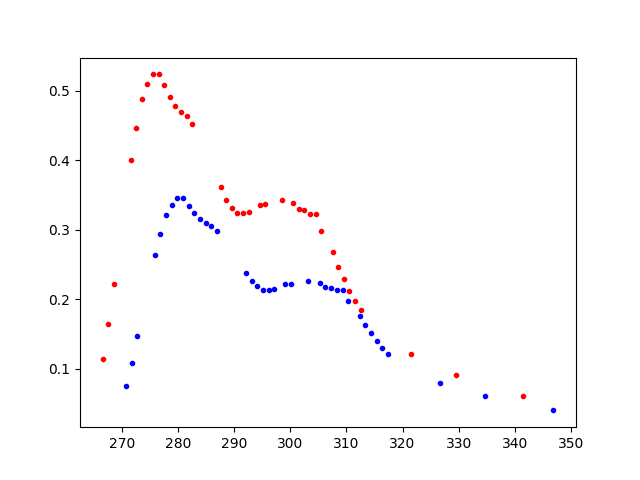

In [11]:
%matplotlib notebook
plt.plot(x, z, 'b.')
#plt.plot(x_gr, fun_x0, 'k')
plt.plot(nx, nz, 'r.')
#plt.plot(X_data, y_mean_)
plt.show()

In [12]:
X_data

array([270.704364  , 270.82948356, 270.95460313, 271.07972269,
       271.20484225, 271.32996182, 271.45508138, 271.58020094,
       271.70532051, 271.83044007, 271.95555963, 272.0806792 ,
       272.20579876, 272.33091832, 272.45603789, 272.58115745,
       272.70627701, 272.83139657, 272.95651614, 273.0816357 ,
       273.20675526, 273.33187483, 273.45699439, 273.58211395,
       273.70723352, 273.83235308, 273.95747264, 274.08259221,
       274.20771177, 274.33283133, 274.4579509 , 274.58307046,
       274.70819002, 274.83330959, 274.95842915, 275.08354871,
       275.20866828, 275.33378784, 275.4589074 , 275.58402697,
       275.70914653, 275.83426609, 275.95938566, 276.08450522,
       276.20962478, 276.33474434, 276.45986391, 276.58498347,
       276.71010303, 276.8352226 , 276.96034216, 277.08546172,
       277.21058129, 277.33570085, 277.46082041, 277.58593998,
       277.71105954, 277.8361791 , 277.96129867, 278.08641823,
       278.21153779, 278.33665736, 278.46177692, 278.58